This notebook shows how to generate visualizations of the urban tree canopy models' predictions.

In [1]:
from src.model import CanopyPredictions, NoGtCanopyPredictions, plot_aggregated_change, plot_satellite_dates

from pathlib import Path
root = Path.cwd()

When ground truth data from lidar is not available, read the results using the `NoGtCanopyPredictions` class. Set `root_dir` to the current working directory to ensure that all output files are saved to the output/site_name folder

Here we're reading in the 2017 model's predictions of 2023 tree canopy cover

In [ ]:
site_name = 'nyc23'
model_name = '2017_model'

cp = NoGtCanopyPredictions.from_npz(root / 'output' / site_name / f'results_for_{site_name}_from_{model_name}.npz',root_dir=root)

This gives access to the following functions:       
* `.map_predictions()`: plot and save a map of the pixel-level predictions of tree canopy.
* `aggregate_to_boundaries()`: aggregates predictions of tree canopy to NTA boundaries and Community District boundaries. These are saved two new .gpkg files.
* `plot_aggregated_tc_maps()`: plot choropleth maps of the aggregated predictions

In [ ]:
m = cp.map_predictions(save=True)
m

In [ ]:

cp.aggregate_to_boundaries()

In [ ]:

cp.plot_aggregated_tc_maps()

More analysis of results is possible when ground truth data is available. Here we read in the results of the 2017 model's predictions of 2017 tree canopy using the `CanopyPredictions` class.

In [ ]:
site_name = 'nyc17'
model_name = '2017_model'

cp = CanopyPredictions.from_npz(root / 'output' / site_name / f'results_for_{site_name}_from_{model_name}.npz',root_dir=root)

Print out a summary of model performance for this year.

In [ ]:
cp.print_model_info()

Site Name: nyc17
                        Model: 2017_model
                        Overall:
                        	MAE: 8.46
                        	RMSE: 12.09
                        	Test set RMSE: 12.4
                        Classifier Metrics:
                        	% correct zero canopy labels: 75.24
                        	% zero canopy pixels found: 73.67
                        RMSE by classification: 
                        	TP RMSE (correctly predicted canopy): 13.08
                        	TN RMSE (correctly predicted no canopy):   0.00
                        	FP RMSE (predicted canopy, actually none): 13.29
                        	FN RMSE (missed actual canopy):            8.55
                    
None


After aggregating predictions to NTA and Community District boundaries, use `plot_aggregated_residuals()` to plot a choropleth map of the residuals. 

In [ ]:

cp.aggregate_to_boundaries()

cp.plot_aggregated_residuals()

In this case, `map_predictions()` produces a map overlaying actual tree canopy, predicted tree canopy, and residuals at the native 30 m resolution


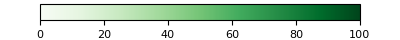
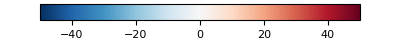
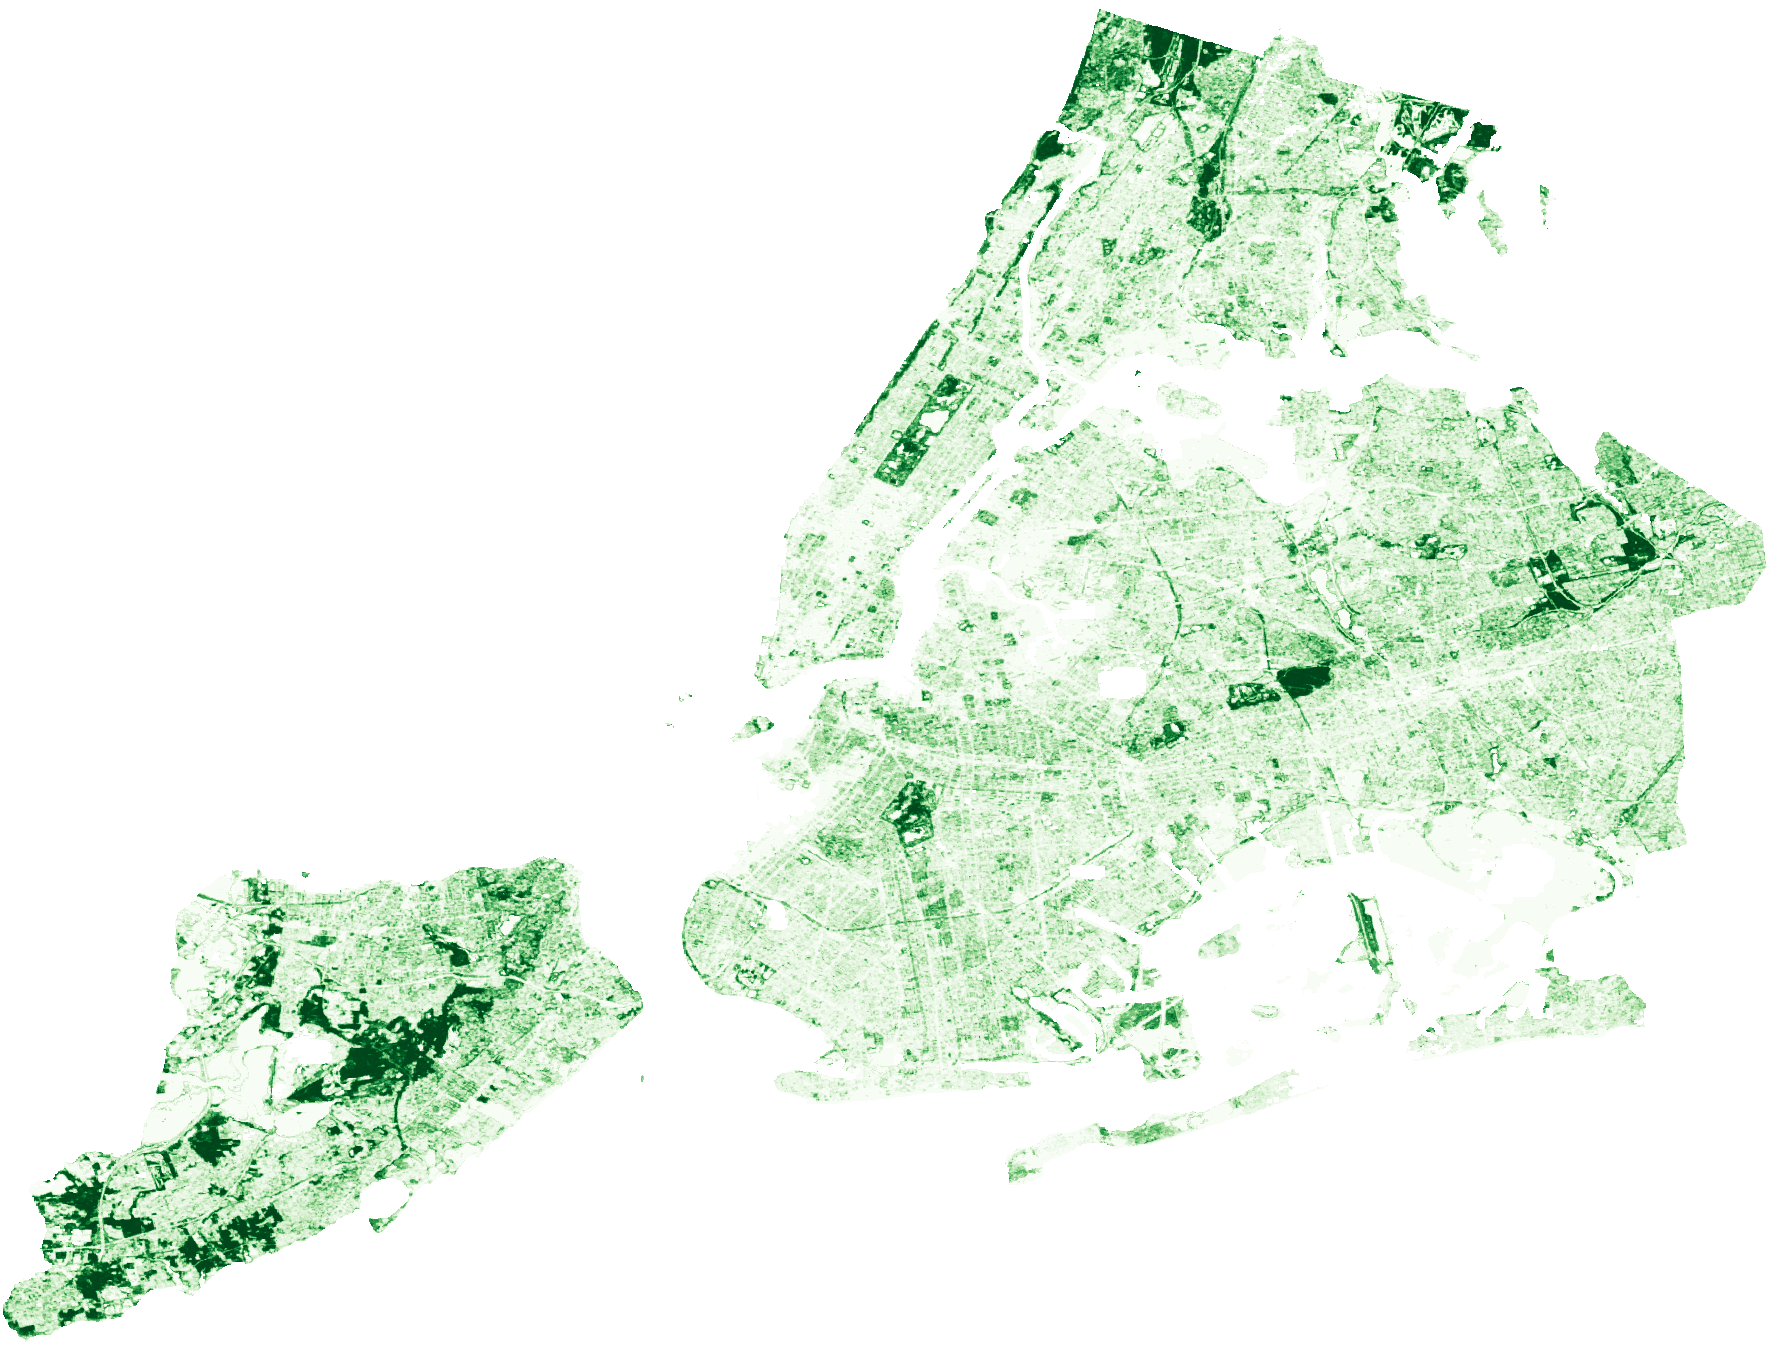
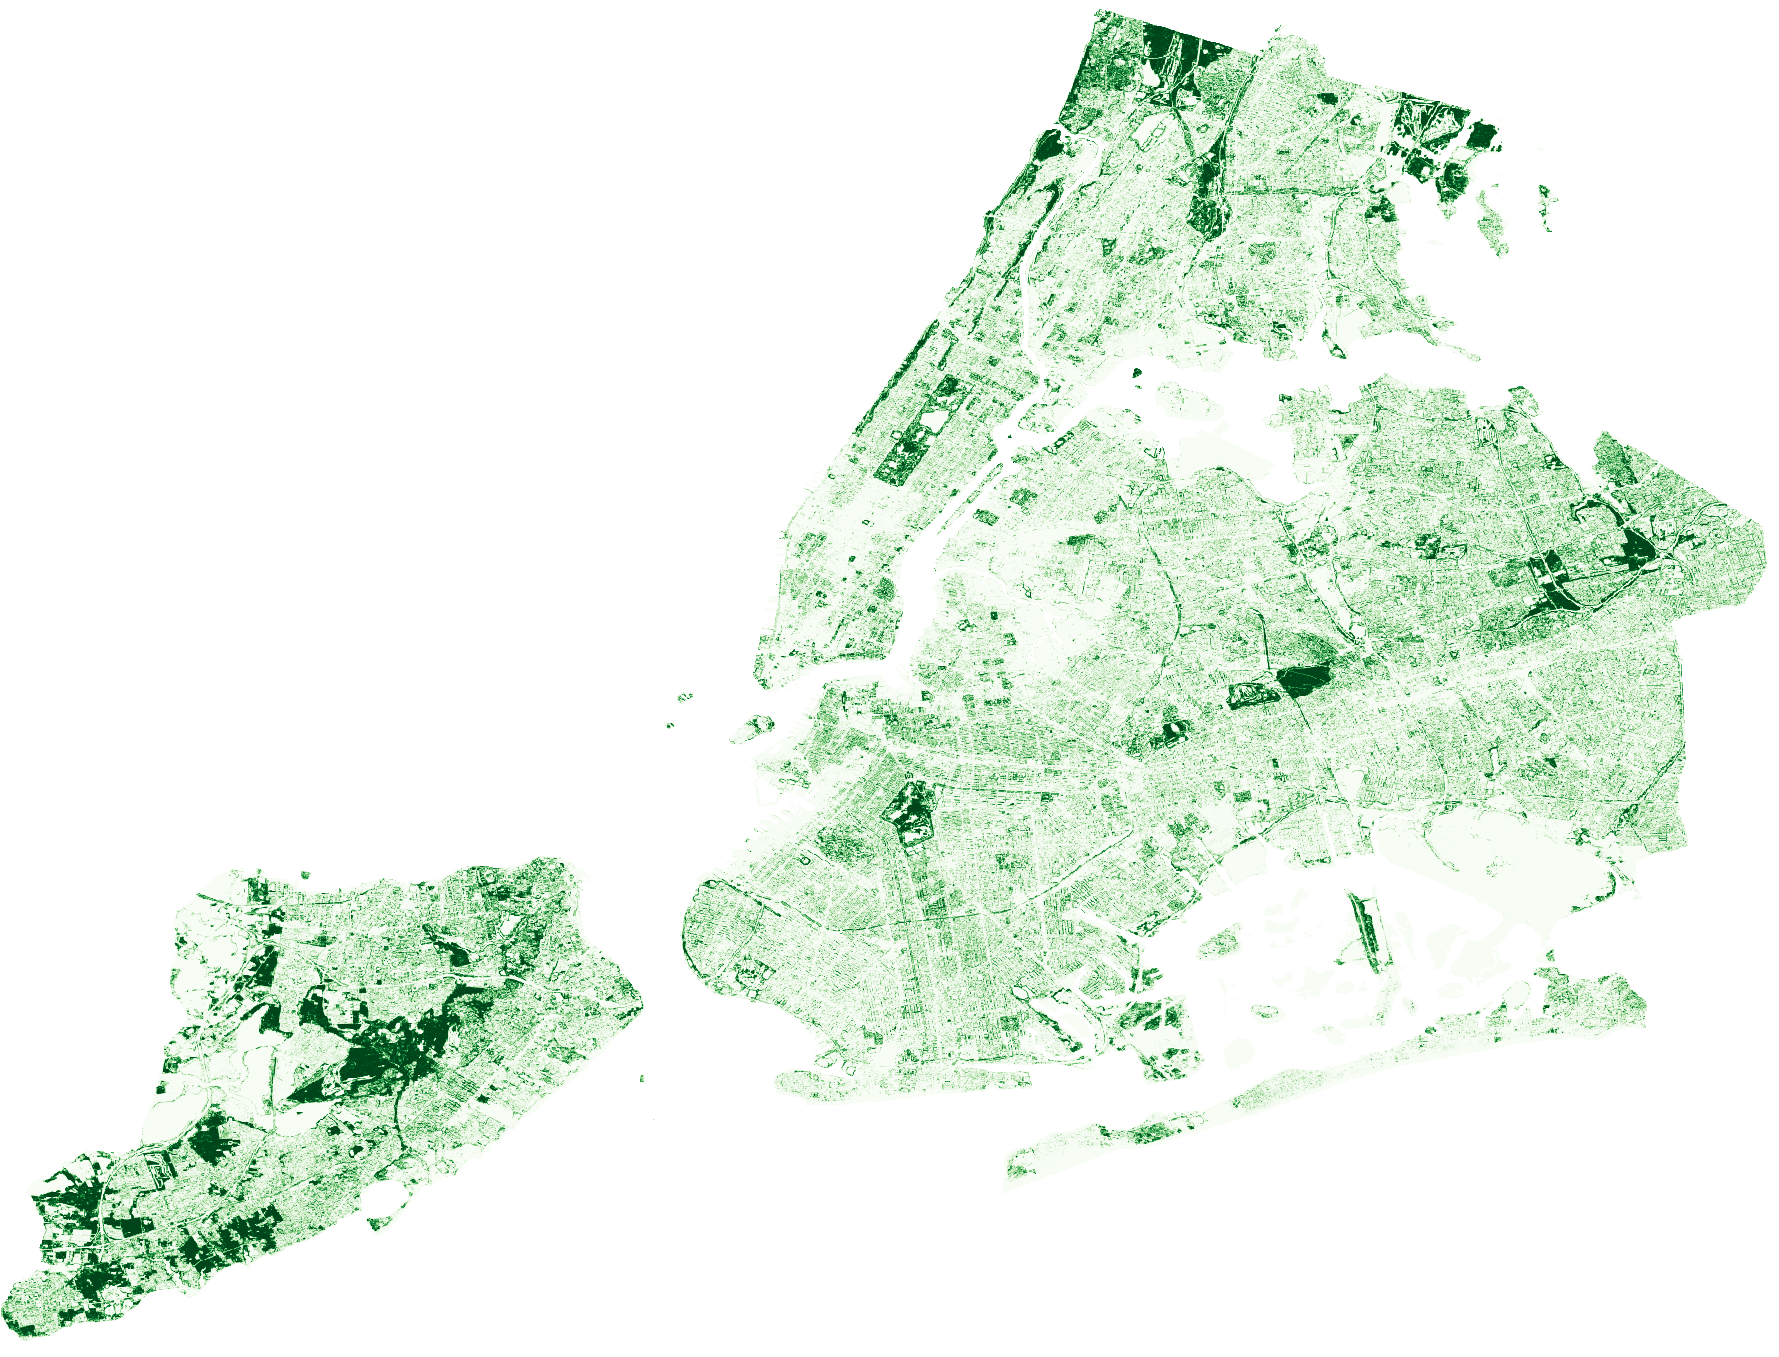
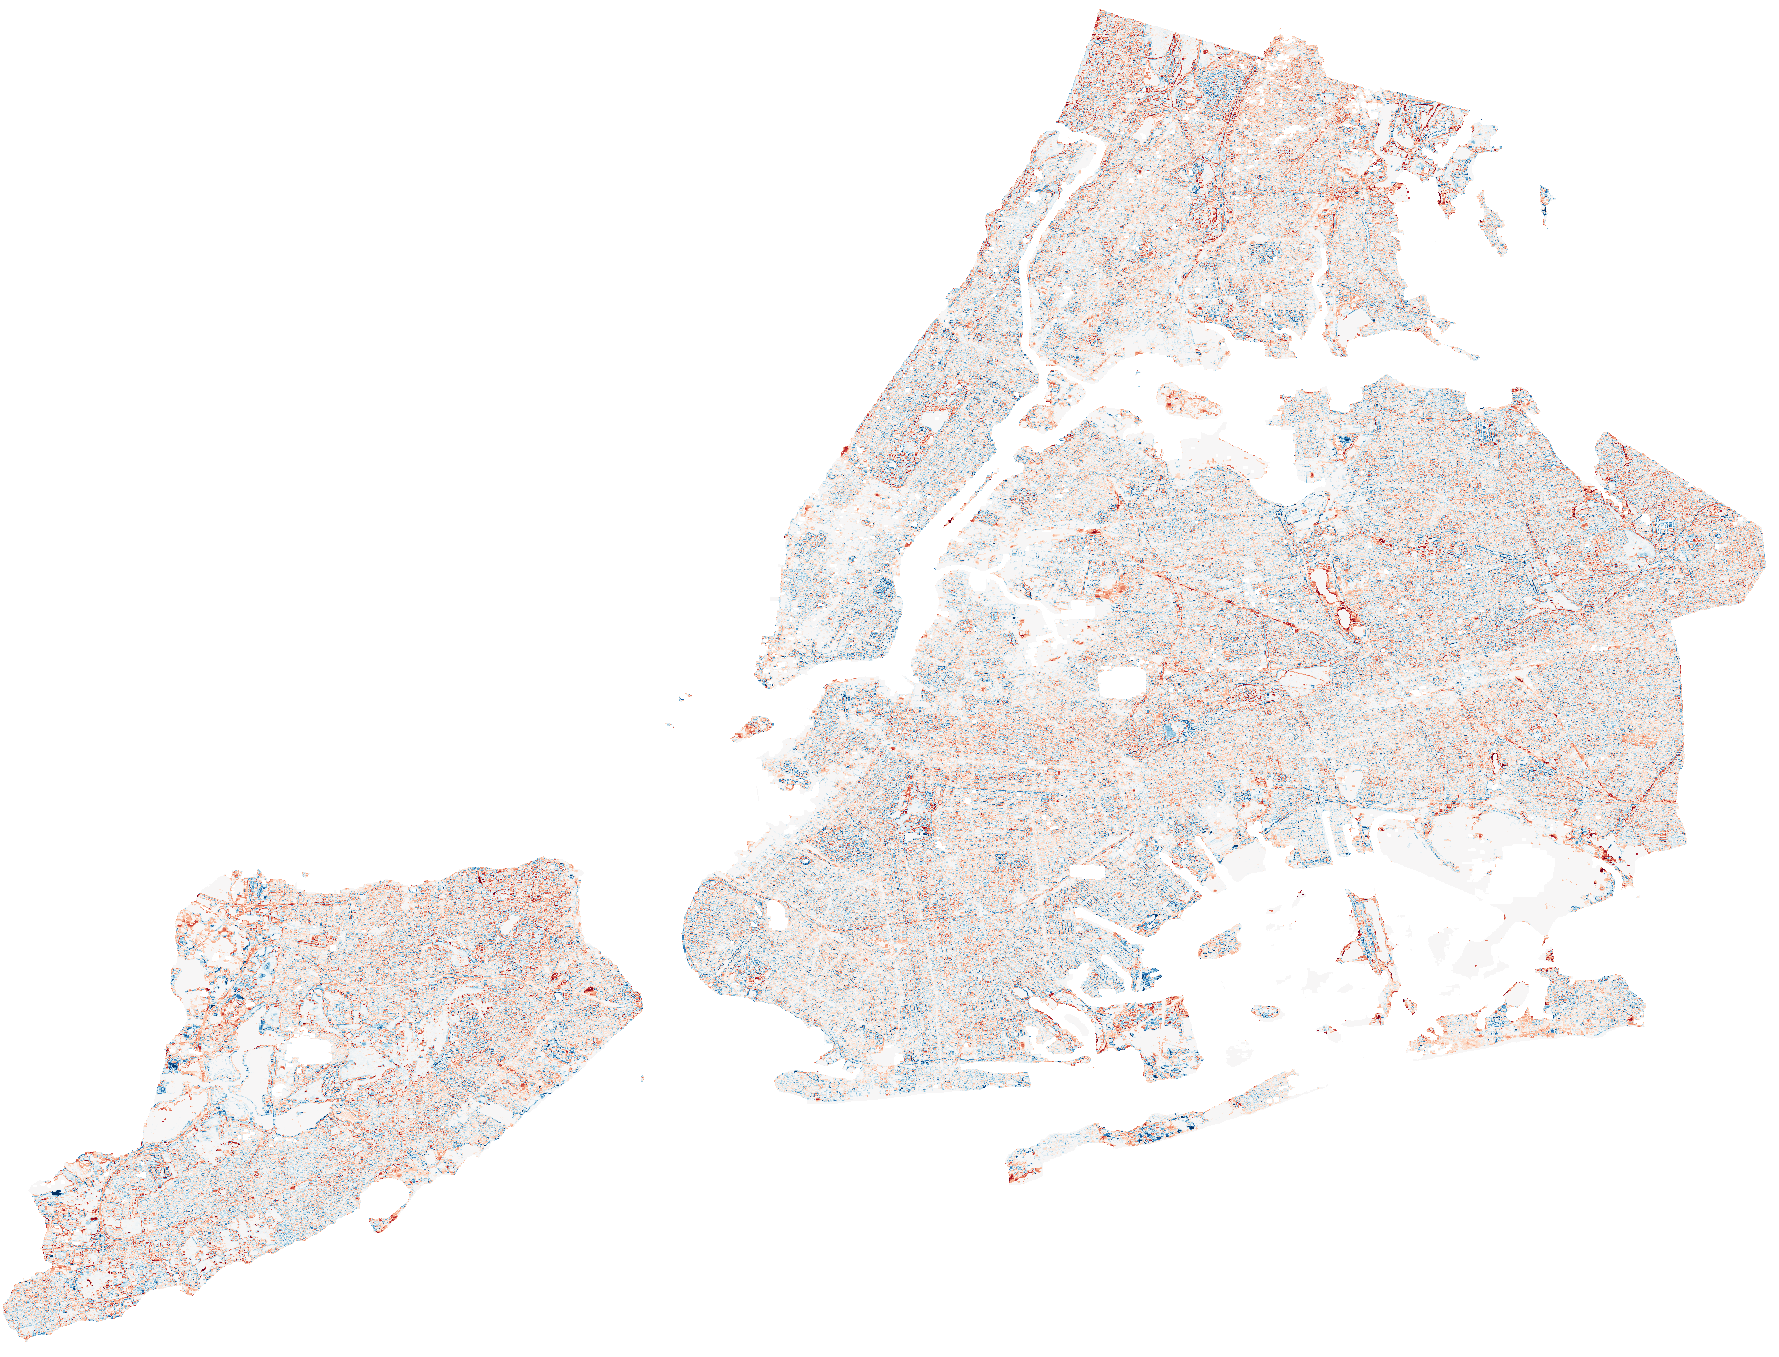

In [ ]:
m = cp.map_predictions(save=True)

m

This class has the following additional functions:
* `plot_rmse_vs_scale()`: plot model error (RMSE) at a series of user-specified scales (e.g. 60 = 60m^2). 
* `get_citywide_tc()`: estimate total tree canopy per borough and citywide. The resulting dataframe saves as a csv to the output/site_name folder.
* `plot_actual_vs_predicted_tc()`: makes a scatter plot of actual vs predicted tree canopy at the NTA and Community District scales and reports spearman's r. 
* `kde_plot()`: plot a kernel density plot of residuals at the NTA scale.

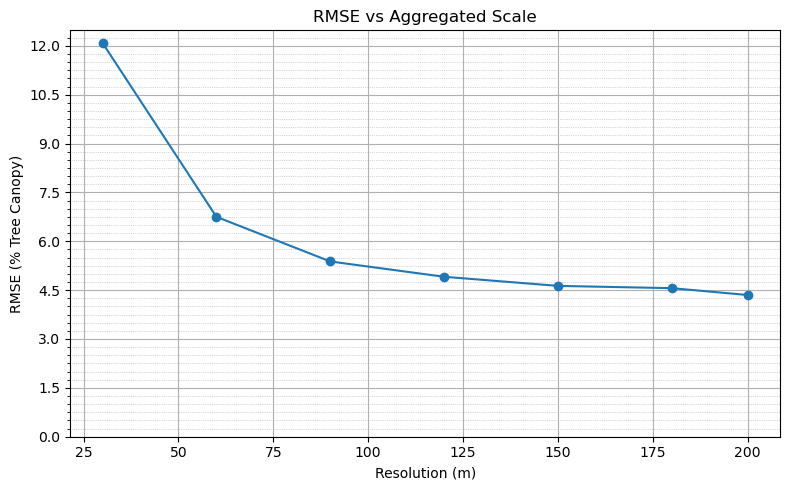

In [ ]:
cp.plot_rmse_vs_scale(res_list=[30,60,90,120,150,180,200])

In [ ]:
df = cp.get_citywide_tc()

df

boro     pct_tc
0          Bronx  25.233175
1  Staten Island  31.924792
2       Brooklyn  17.205675
3         Queens  18.880500
4      Manhattan  19.334655
0          Total  21.936248

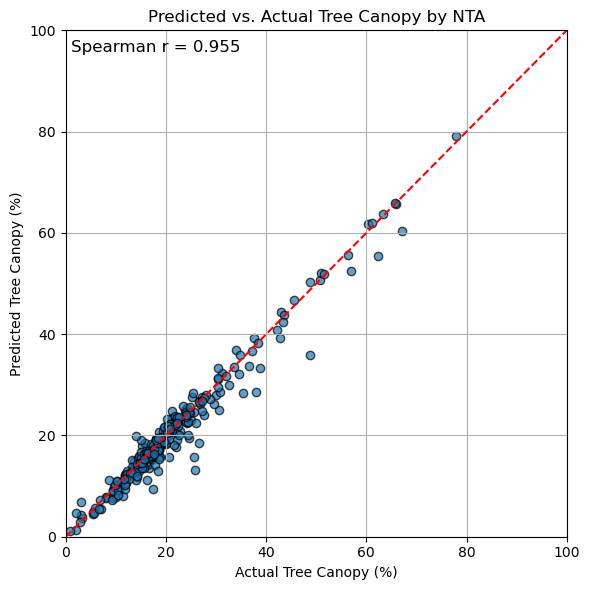

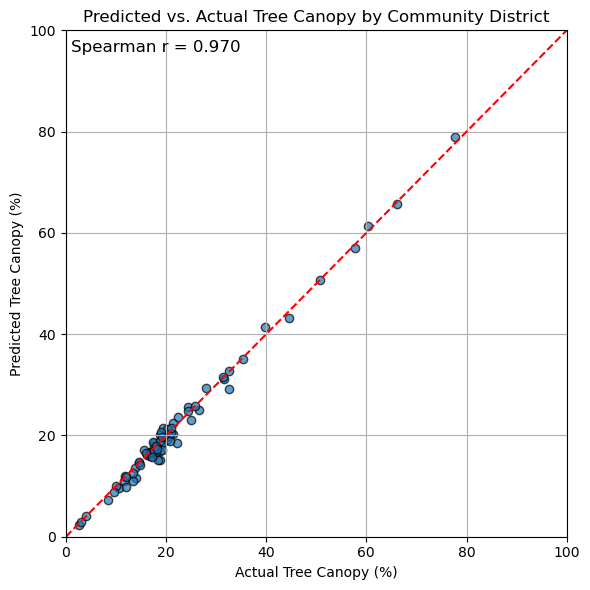

In [ ]:
 
cp.plot_actual_v_predicted_tc()

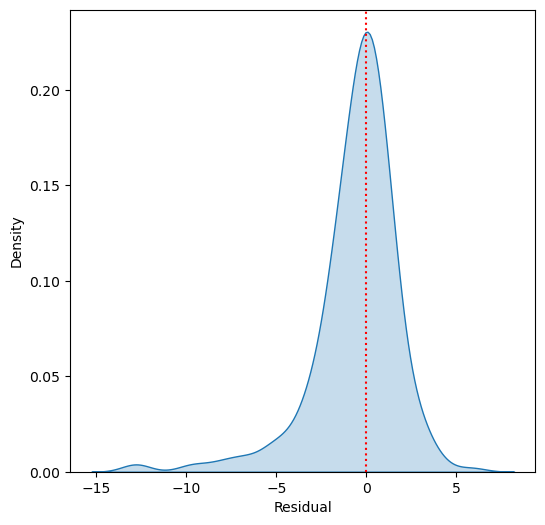

In [ ]:
cp.kde_plot()

#### Change in Tree Canopy 2017 - 2021

Once you've aggregated a model's predictions for both years (2017 and 2021) to the NTA and Community District scale, you can look at change over time and compare it to the actual change. 

`plot_aggregated_change()` plots choropleth maps of the difference in tree canopy and saves them to the output folder. Set `plot_actual=True` if you'd like to also plot and save a choropleth of actual change in tree canopy. 

The actual change file (actual_change_nta_cd.gpkg) should be saved to the data folder.

In [ ]:
plot_aggregated_change(root=root,model_name='2017_model',plot_actual=True)

#### Visualize dates of satellite imagery acquisition

`plot_satellite_dates()` allows you to see when and how much imagery from each sensor went into creating the training data for each site. It pulls data from 'data/satellite_image_dates.txt' that was saved when the imagery was downloaded. (In this case, data from November was acquired, but ultimately not included in model training)

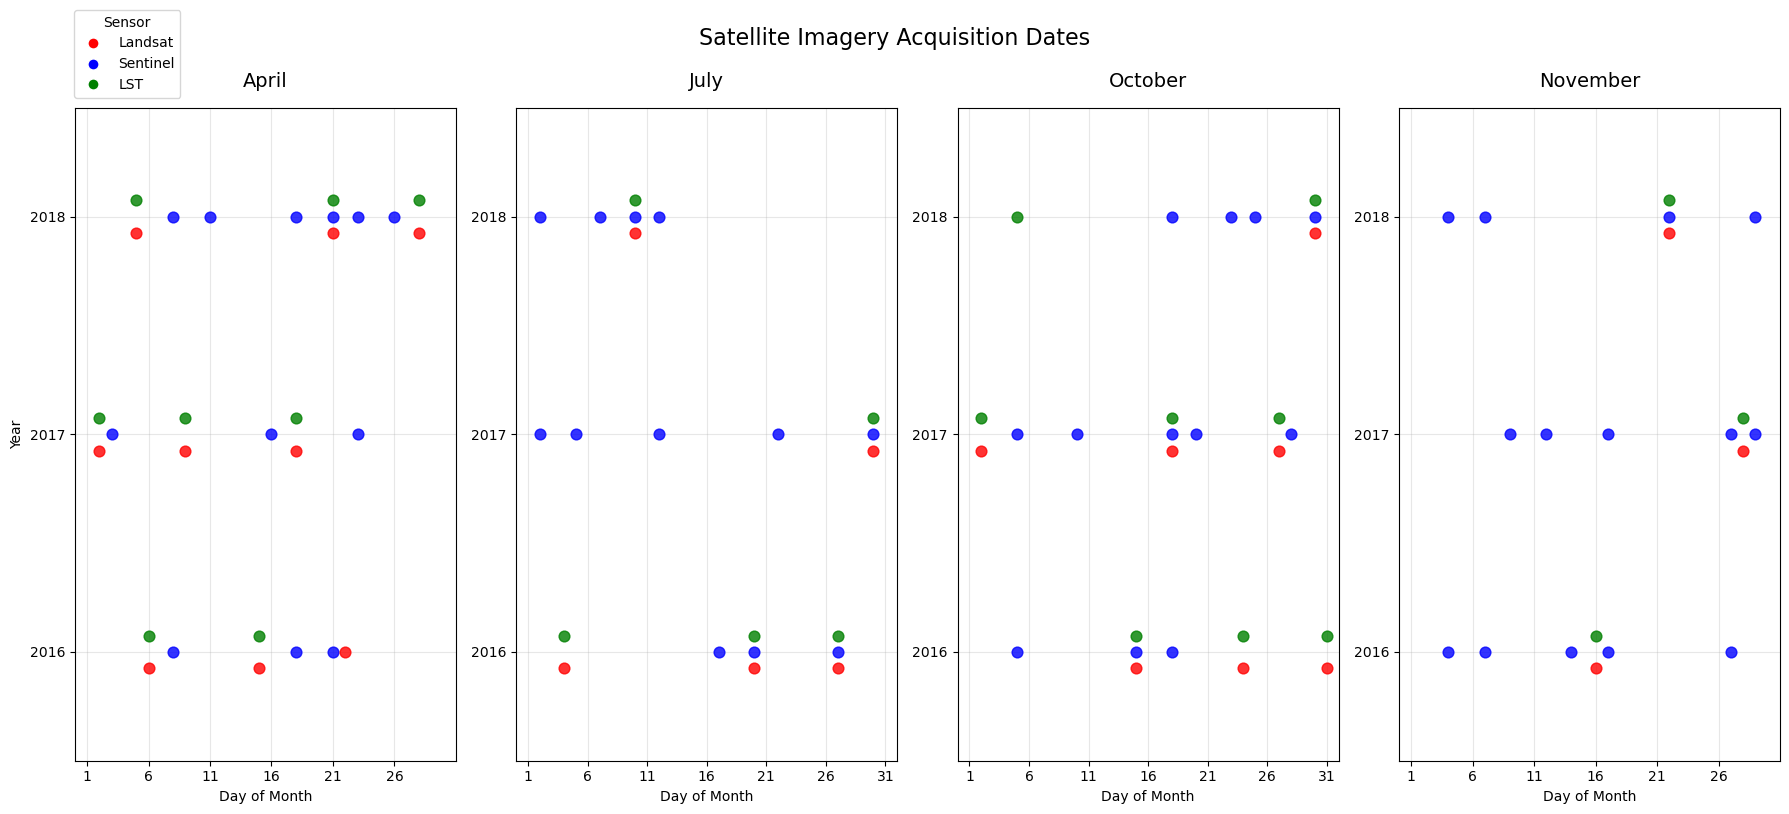

In [ ]:
plot_satellite_dates(root=root,site_name='nyc17')